In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Connect to the database
conn = sqlite3.connect('../youbike_data.db')

In [23]:
# Load data into a DataFrame
def load_data():
    query = '''
        SELECT sno, sna, mday, available_rent_bikes, available_return_bikes, latitude, longitude, total, snaen
        FROM youbike_data
        ORDER BY mday
    '''
    df = pd.read_sql_query(query, conn)
    # Convert mday to datetime for easier plotting
    df['mday'] = pd.to_datetime(df['mday'])
    return df


In [47]:
# Visualization 1: Available Bikes Over Time for Selected Stations
def plot_available_bikes(df, station_ids):
    plt.figure(figsize=(12, 6))
    for station in station_ids:
        station_data = df[df['sno'] == station]
        plt.plot(station_data['mday'], station_data['available_rent_bikes'], label=station_data['snaen'].iloc[0])
    
    plt.xlabel("Time")
    plt.ylabel("Available Rent Bikes")
    plt.title("Available Bikes Over Time")
    plt.legend(loc="upper right")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Adjust interval for fewer ticks
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.gcf().autofmt_xdate()  # Auto-adjust x-axis labels
    plt.show()


# Visualization 1: Available Bikes Over Time for Selected Stations
def plot_available_bikes_with_total(df, station_ids):
    plt.figure(figsize=(12, 6))
    
    for station in station_ids:
        station_data = df[df['sno'] == station]
        # Plot available rent bikes
        plt.plot(station_data['mday'], station_data['available_rent_bikes'], 
                 label=f"{station_data['snaen'].iloc[0]} - Available Bikes")
        # Plot total capacity
        plt.plot(station_data['mday'], station_data['total'], 
                 linestyle='--', label=f"{station_data['snaen'].iloc[0]} - Total Capacity")
    
    plt.xlabel("Time")
    plt.ylabel("Number of Bikes")
    plt.title("Available Bikes and Total Capacity Over Time")
    plt.legend(loc="upper right", fontsize=8)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Adjust interval for fewer ticks
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.gcf().autofmt_xdate()  # Auto-adjust x-axis labels
    plt.show()


# Visualization 2: Station Heatmap of Bike Availability
def plot_station_availability(df):
    # Group data by station and get the latest available bike count
    latest_data = df.sort_values('mday').groupby('sno').last().reset_index()
    
    plt.figure(figsize=(10, 8))
    plt.scatter(latest_data['longitude'], latest_data['latitude'], 
                s=latest_data['available_rent_bikes'] * 5,  # Scale marker size
                c=latest_data['available_rent_bikes'], cmap='viridis', alpha=0.7)
    
    plt.colorbar(label="Available Rent Bikes")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Bike Availability by Station")
    plt.show()


/tmp/ipykernel_1487710/1656805241.py:15: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  plt.tight_layout()  # Adjust layout for better spacing
/home/mojoee/Development/YouBike/YouBikeLive/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


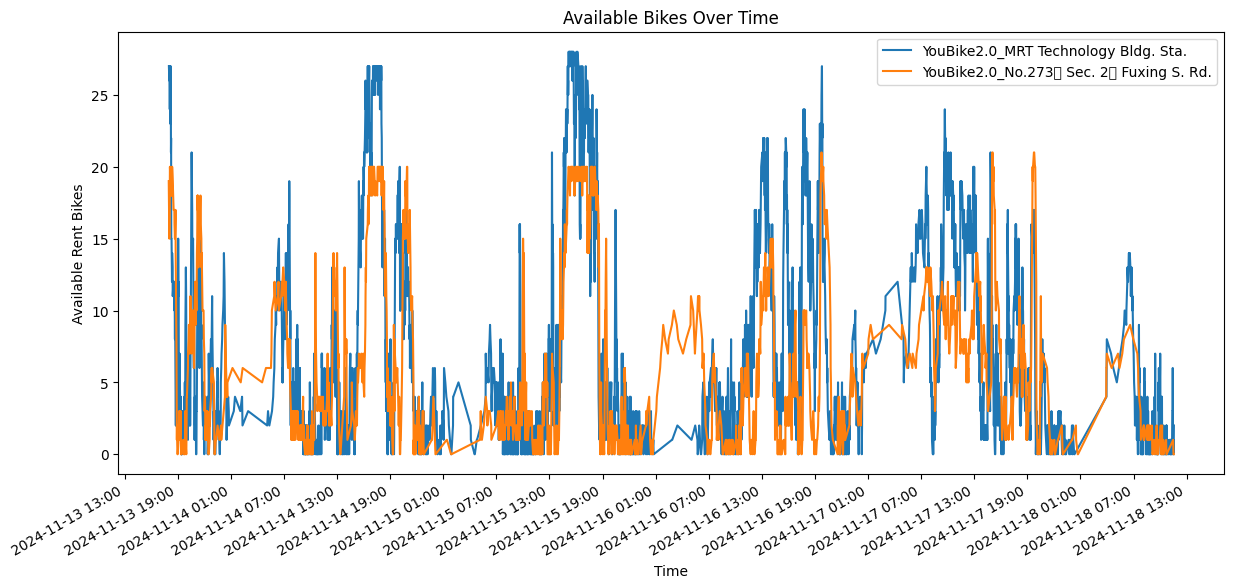

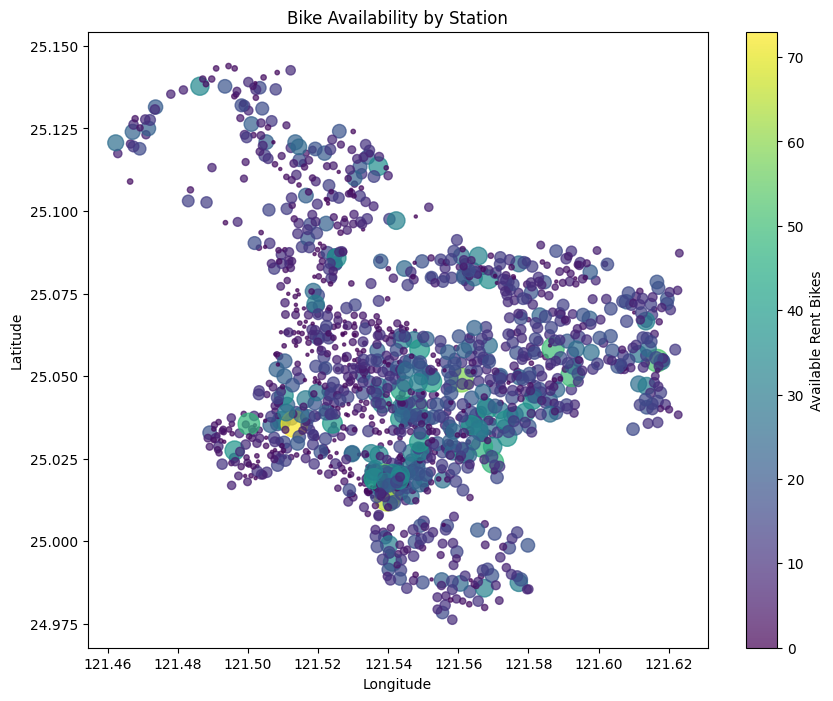

In [48]:
# Load data from database
df = load_data()

# Plot available bikes over time for selected stations (replace with station IDs you want to track)
plot_available_bikes(df, station_ids=['500101001', '500101002'])

# Plot station availability as a heatmap
plot_station_availability(df)

In [34]:
df.head()

,sno,sna,mday,available_rent_bikes,available_return_bikes,latitude,longitude,total,snaen
0,500101020,YouBike2.0_溫州停車場,2024-11-01 03:48:14,0,5,25.02093,121.53310,5,YouBike2.0_Wenzhou Parking Lot
1,500104110,YouBike2.0_海光公園南側,2024-11-01 03:49:14,0,12,25.08036,121.50840,12,YouBike2.0_Haiguang Park (South)
2,500103029,YouBike2.0_朝陽公園,2024-11-01 03:49:15,0,10,25.05592,121.51367,10,YouBike2.0_Zhaoyang Park
3,500104001,YouBike2.0_劍潭抽水站,2024-11-01 03:49:15,0,15,25.08128,121.51784,17,YouBike2.0_Jiantan Pumping Station
4,500104057,YouBike2.0_社子國小,2024-11-01 03:49:15,0,15,25.09058,121.50142,15,YouBike2.0_Shezi Elementary School


In [35]:
# how many stations are there in Taipei currently
stations = df["sno"].unique()
len(stations)

1498

In [36]:
#make sure it matches the , check
station_names = df["sna"].unique()
len(station_names)

1498

In [37]:
# how many entries in total
len(df)

1446089

In [38]:
# how many days we covered in days
len(df)/len(station_names)/6/24

6.703794874647678

In [39]:
# let's look at a unique station, for example the one at NTUST
# sno 500101024 is NTUST Main Gate
# sno 500101025 is NTUST Side Gate
# sno 500101027 is NTUST Back Gate
df.columns

Index(['sno', 'sna', 'mday', 'available_rent_bikes', 'available_return_bikes',
       'latitude', 'longitude', 'total', 'snaen'],
      dtype='object')

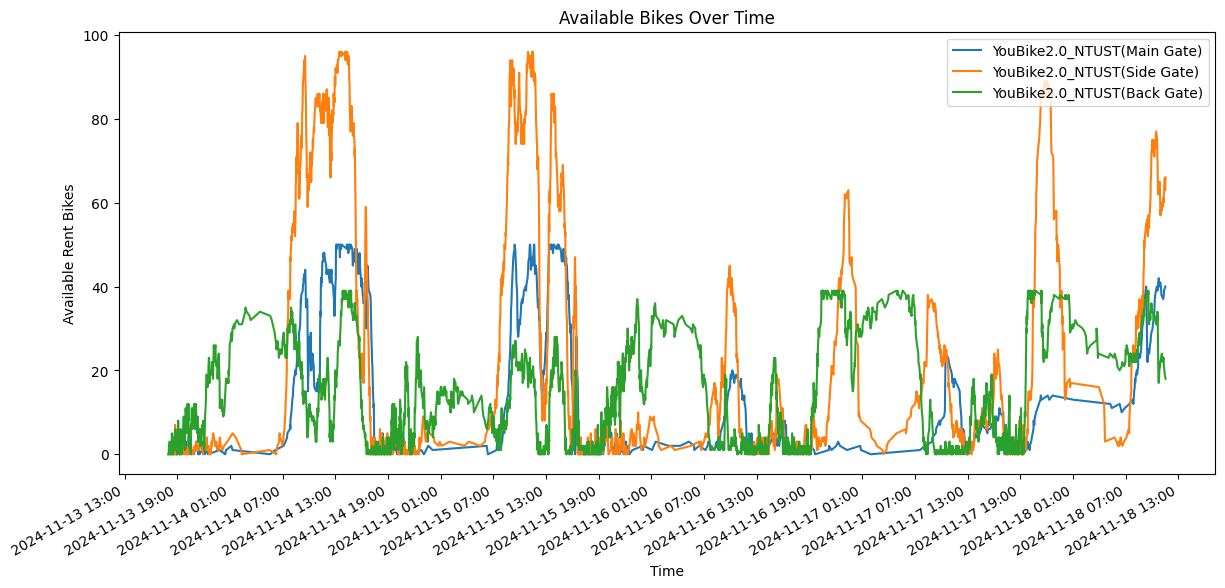

In [50]:
plot_available_bikes(df, station_ids=['500101024', '500101025', '500101027'])

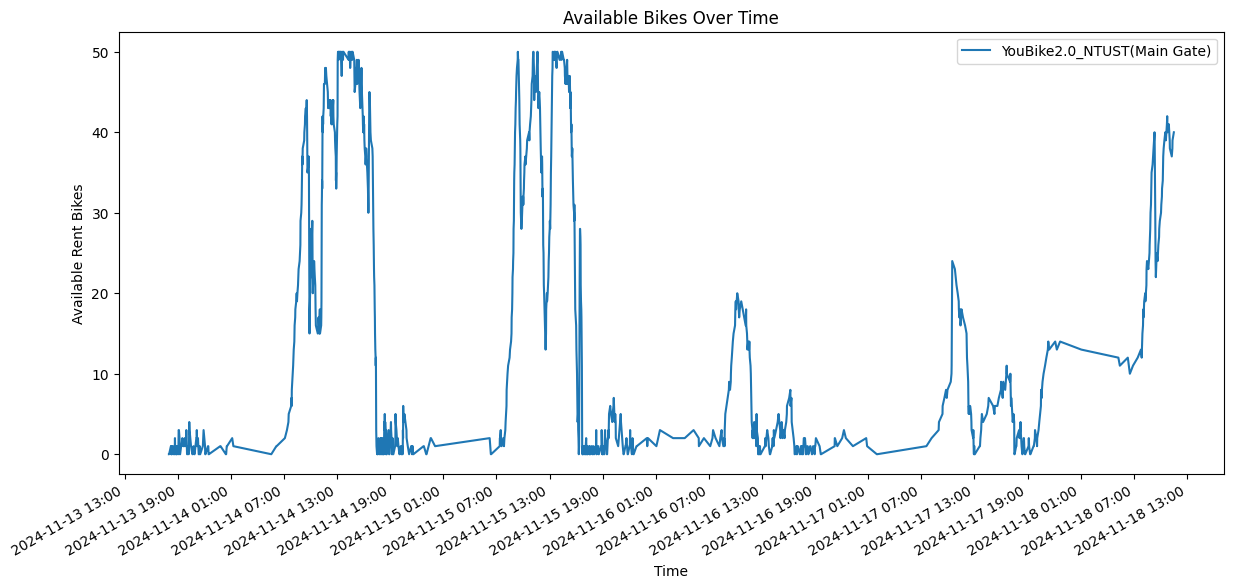

In [55]:
plot_available_bikes(df, station_ids=['500101024'])

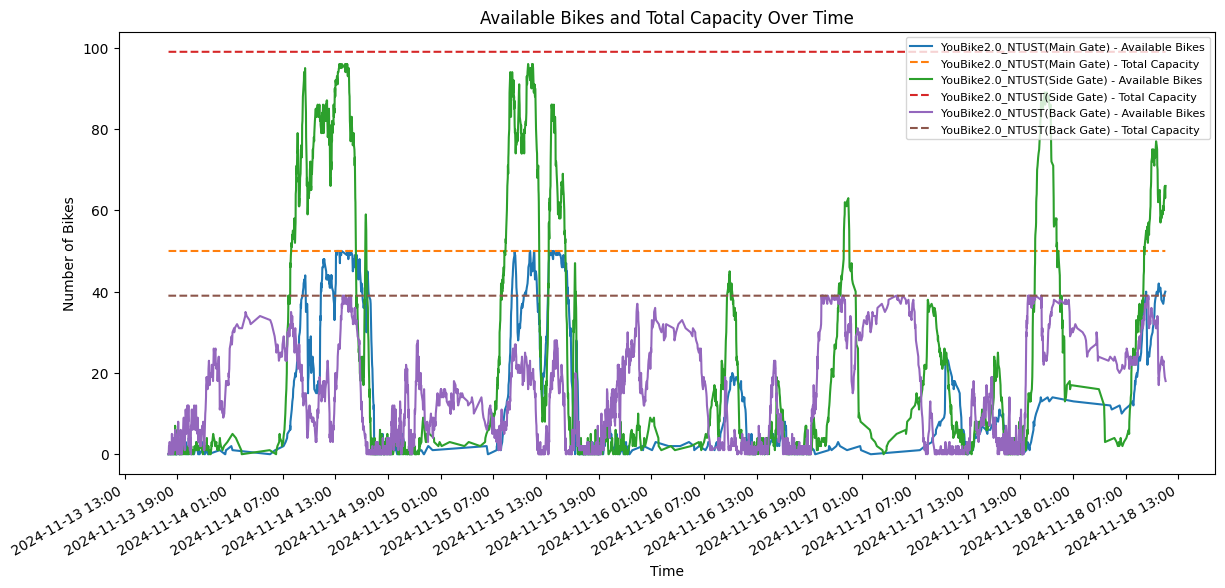

In [51]:
plot_available_bikes_with_total(df, station_ids=['500101024', '500101025', '500101027'])

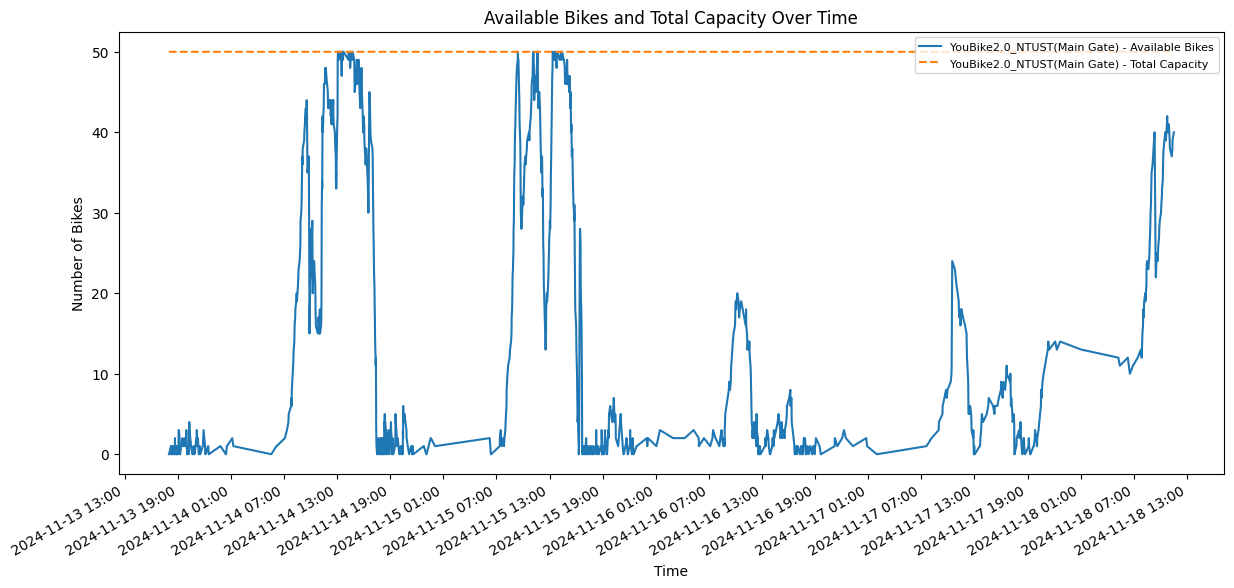

In [52]:
plot_available_bikes_with_total(df, station_ids=['500101024'])

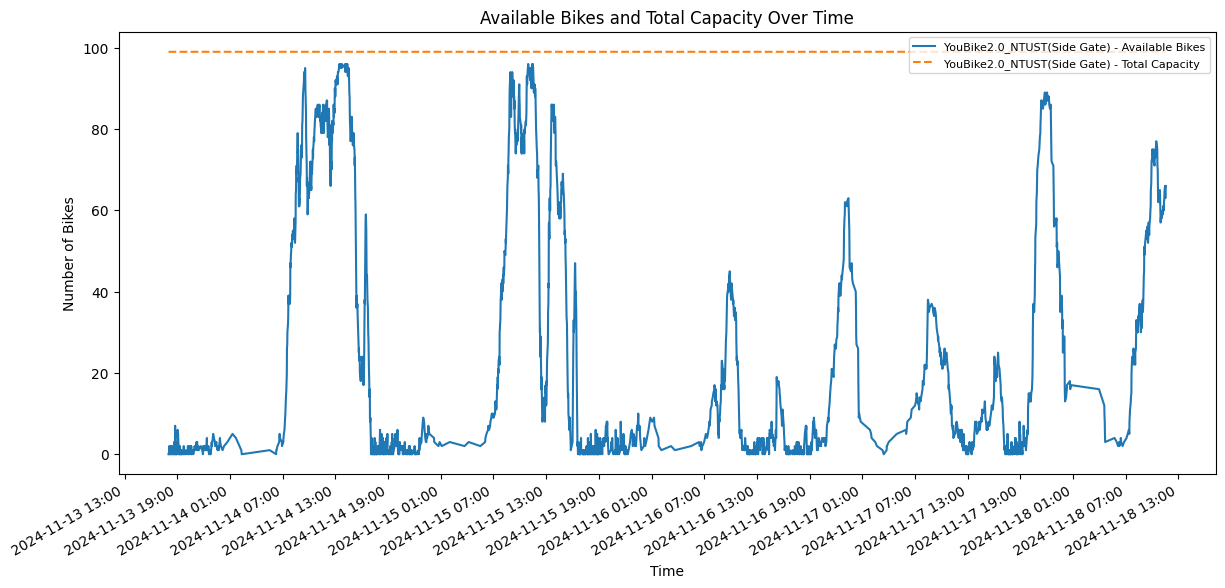

In [53]:
plot_available_bikes_with_total(df, station_ids=['500101025'])

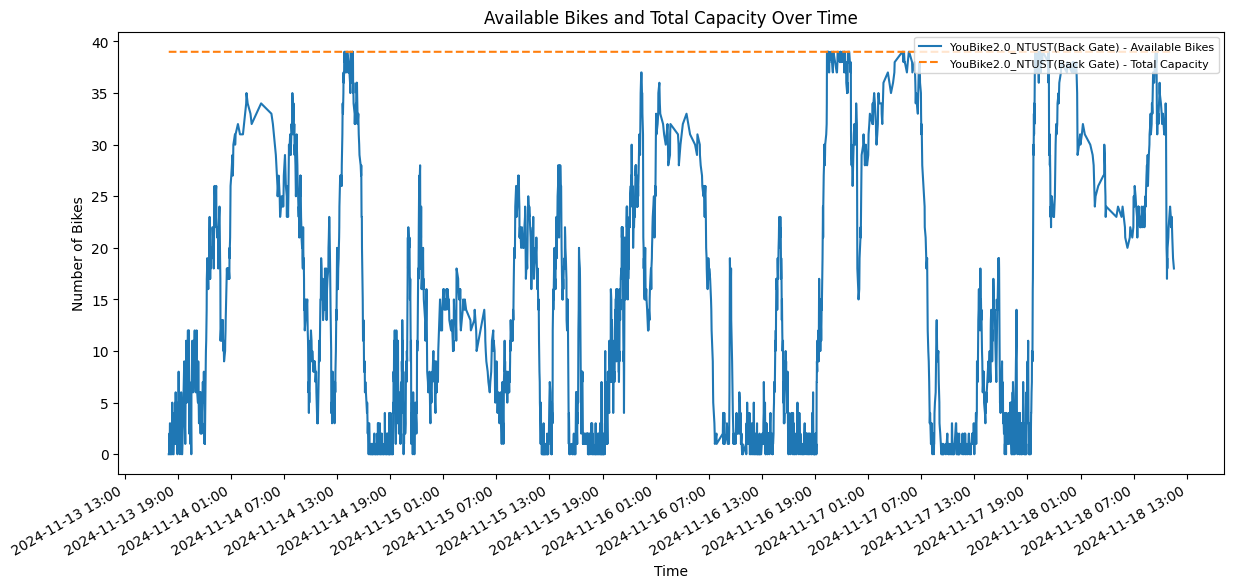

In [54]:
plot_available_bikes_with_total(df, station_ids=['500101027'])